# 0.0 Imports

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt

import inflection

from matplotlib import pyplot as plt
from IPython.core.display import HTML
import matplotlib.patches as mpatches
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

import pickle



# Help Funcions

In [2]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.1 Loading Dataset

In [3]:
df_raw = pd.read_csv('/Users/franciscocaetano/Documents/Data Science/Health_Insurance_Cross_Sell/health_insurance_cross_sell/data/train.csv')

In [4]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Description

In [5]:
df1 = df_raw.copy()

In [6]:
cols = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

# transform to lower case 
df1.columns = cols

In [7]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.1 Data dimention

In [8]:
print('Num of rows: {}'.format(df1.shape[0]))
print('Num of cols: {}'.format(df1.shape[1]))


Num of rows: 381109
Num of cols: 12


## 1.2 Data type

In [9]:
df_raw.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## 1.3 Check Nas

In [10]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data descreptive

In [11]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes= df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

In [12]:
# central tendency
mean_ = pd.DataFrame(num_attributes.apply(np.mean)).T
median_ = pd.DataFrame(num_attributes.apply(np.median)).T


# dispersion
std_ = pd.DataFrame(num_attributes.apply(np.std)).T
min_ = pd.DataFrame(num_attributes.apply(min)).T
max_ = pd.DataFrame(num_attributes.apply(max)).T
range_ = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
skew_  = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
kurtosis_ = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat variabels

m = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurtosis_]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

''''

*** DICTIONARY VARS ****
driving_license : If have or not drive licence
region_code : number of code region
previously_insured : if person previously have. insurance with the company
annual_premium : how much pereson payed annual services insurance
policy_sales_channel : code to indicate the channel preference to contact customer 
vintage: how long customer has been in the company *(days) 
response: people interested in the new service, yes or not (0, or 1) by email research
'''


"'\n\n*** DICTIONARY VARS ****\ndriving_license : If have or not drive licence\nregion_code : number of code region\npreviously_insured : if person previously have. insurance with the company\nannual_premium : how much pereson payed annual services insurance\npolicy_sales_channel : code to indicate the channel preference to contact customer \nvintage: how long customer has been in the company *(days) \nresponse: people interested in the new service, yes or not (0, or 1) by email research\n"

# 2.0 Feature Engineering

In [13]:
df2 = df1.copy()

In [14]:
# vehicle_age
df2['vehicle_age'] = df2['vehicle_age'] .apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                        if x == '1-2 Year' else 'less_than_1_year')
# demage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,less_than_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,less_than_1_year,0,27496.0,152.0,39,0


# 3.0 Data Filtering

In [16]:
df3 = df2.copy()

# 4.0 EDA

In [17]:
df4 = df3.copy()

## 4.1 Univariate Analysis

<Axes: xlabel='response', ylabel='age'>

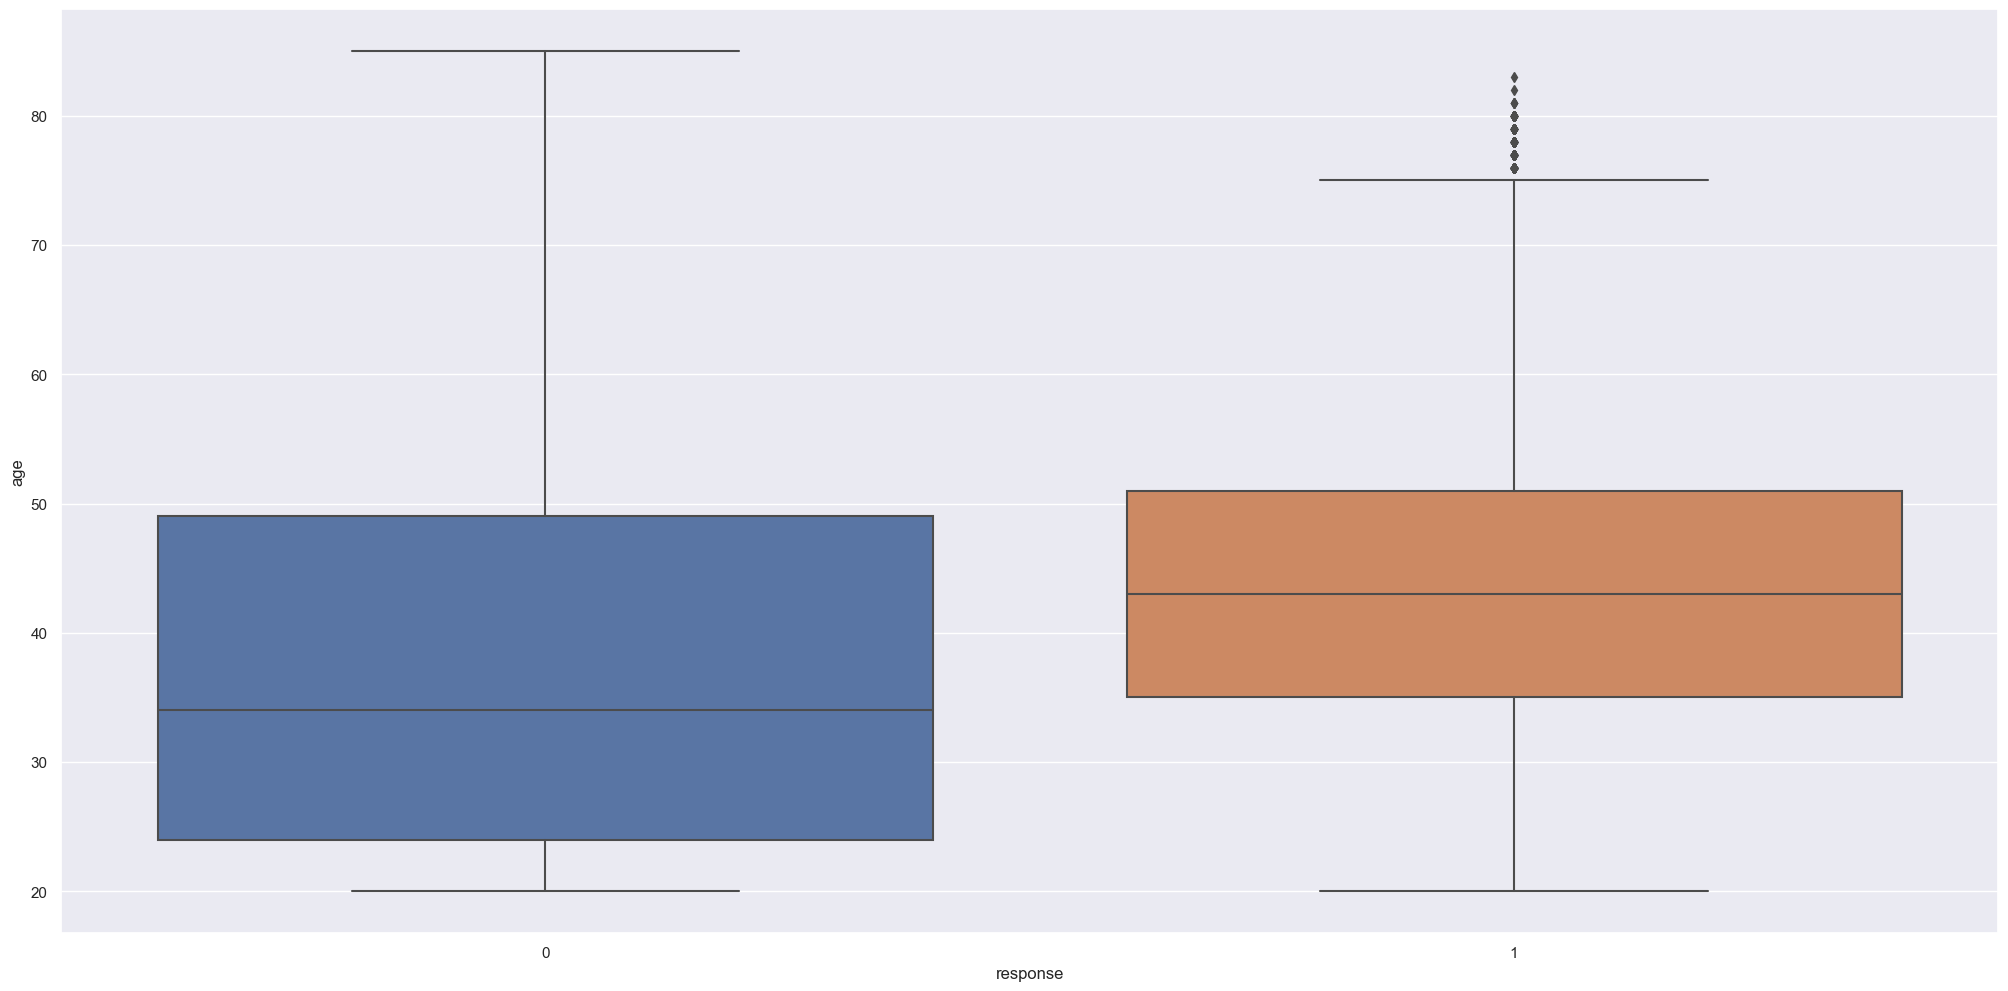

In [18]:
# age
sns.boxplot(x = 'response', y = 'age', data= df4)

<Axes: xlabel='age', ylabel='Count'>

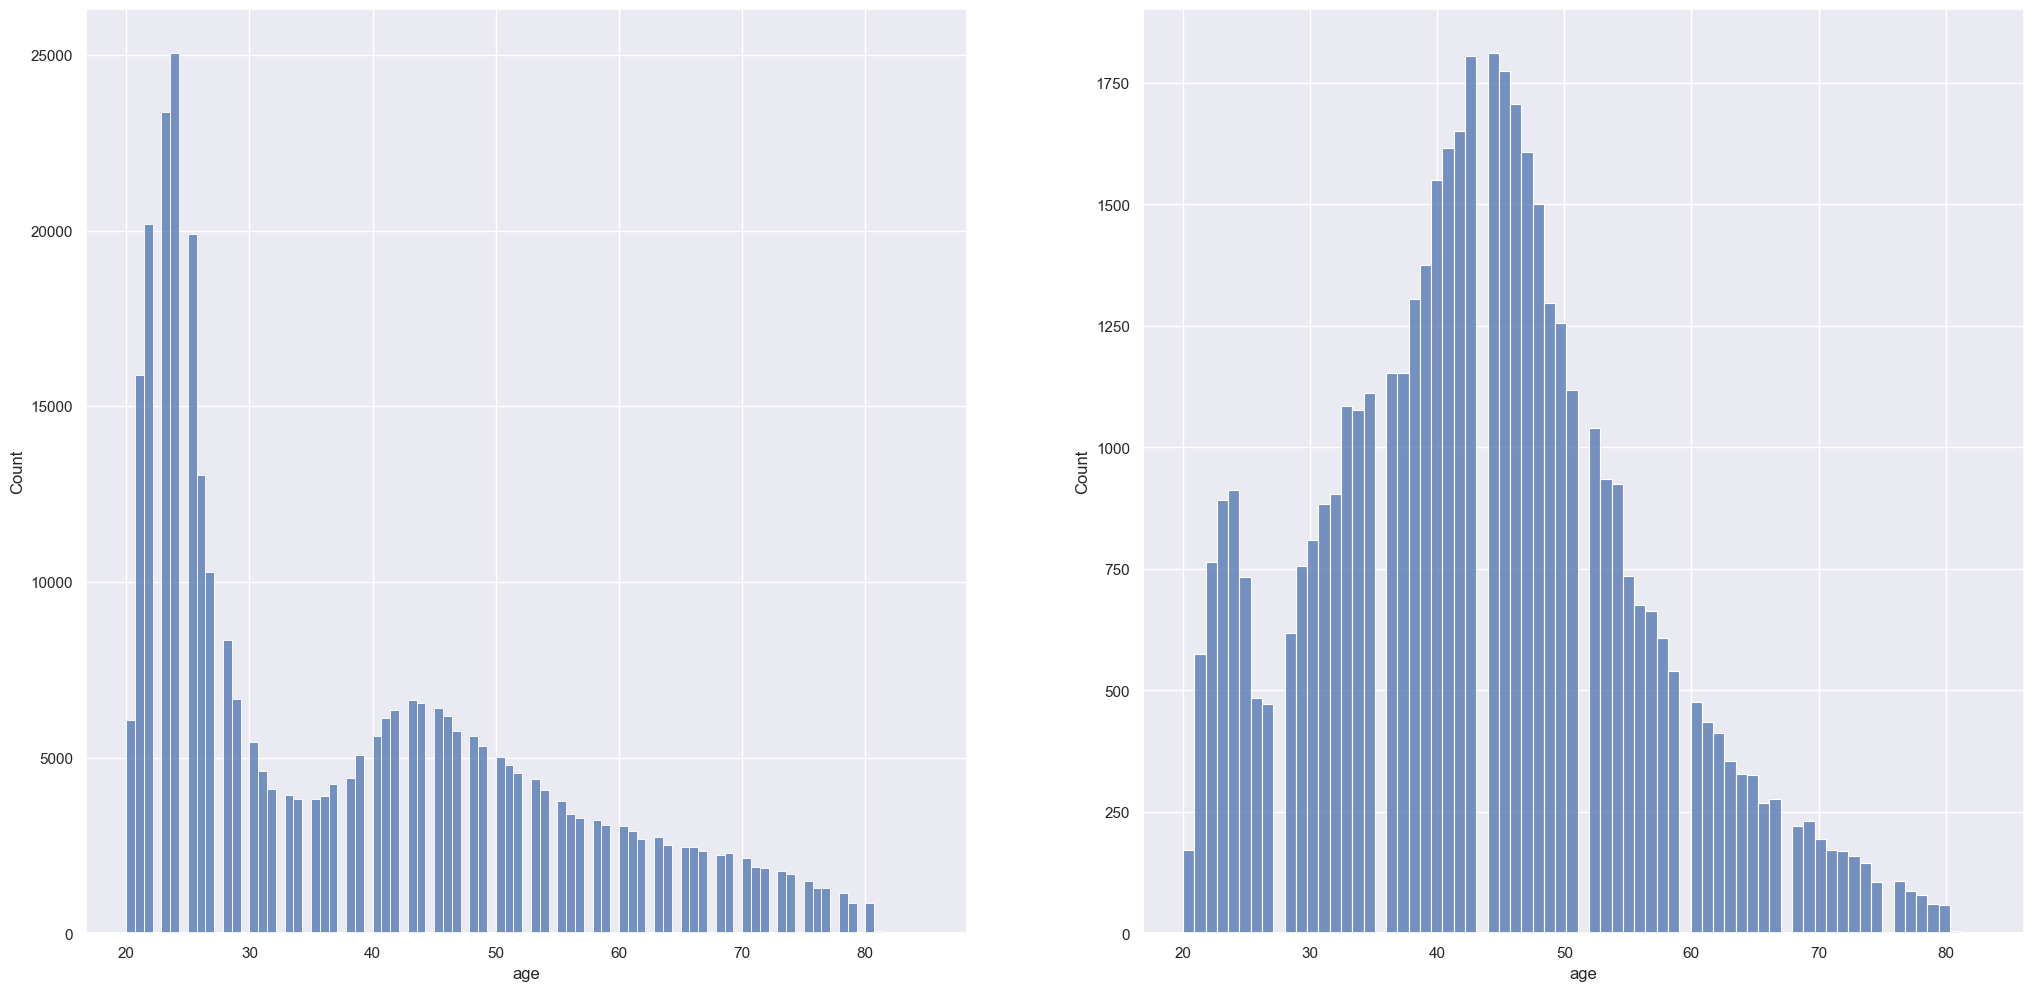

In [19]:
plt.subplot(1, 2, 1)

aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

plt.subplot(1, 2, 2)
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux00)

In [20]:
df4['response'].value_counts()/len(df4)

0    0.877437
1    0.122563
Name: response, dtype: float64

<Axes: xlabel='response', ylabel='annual_premium'>

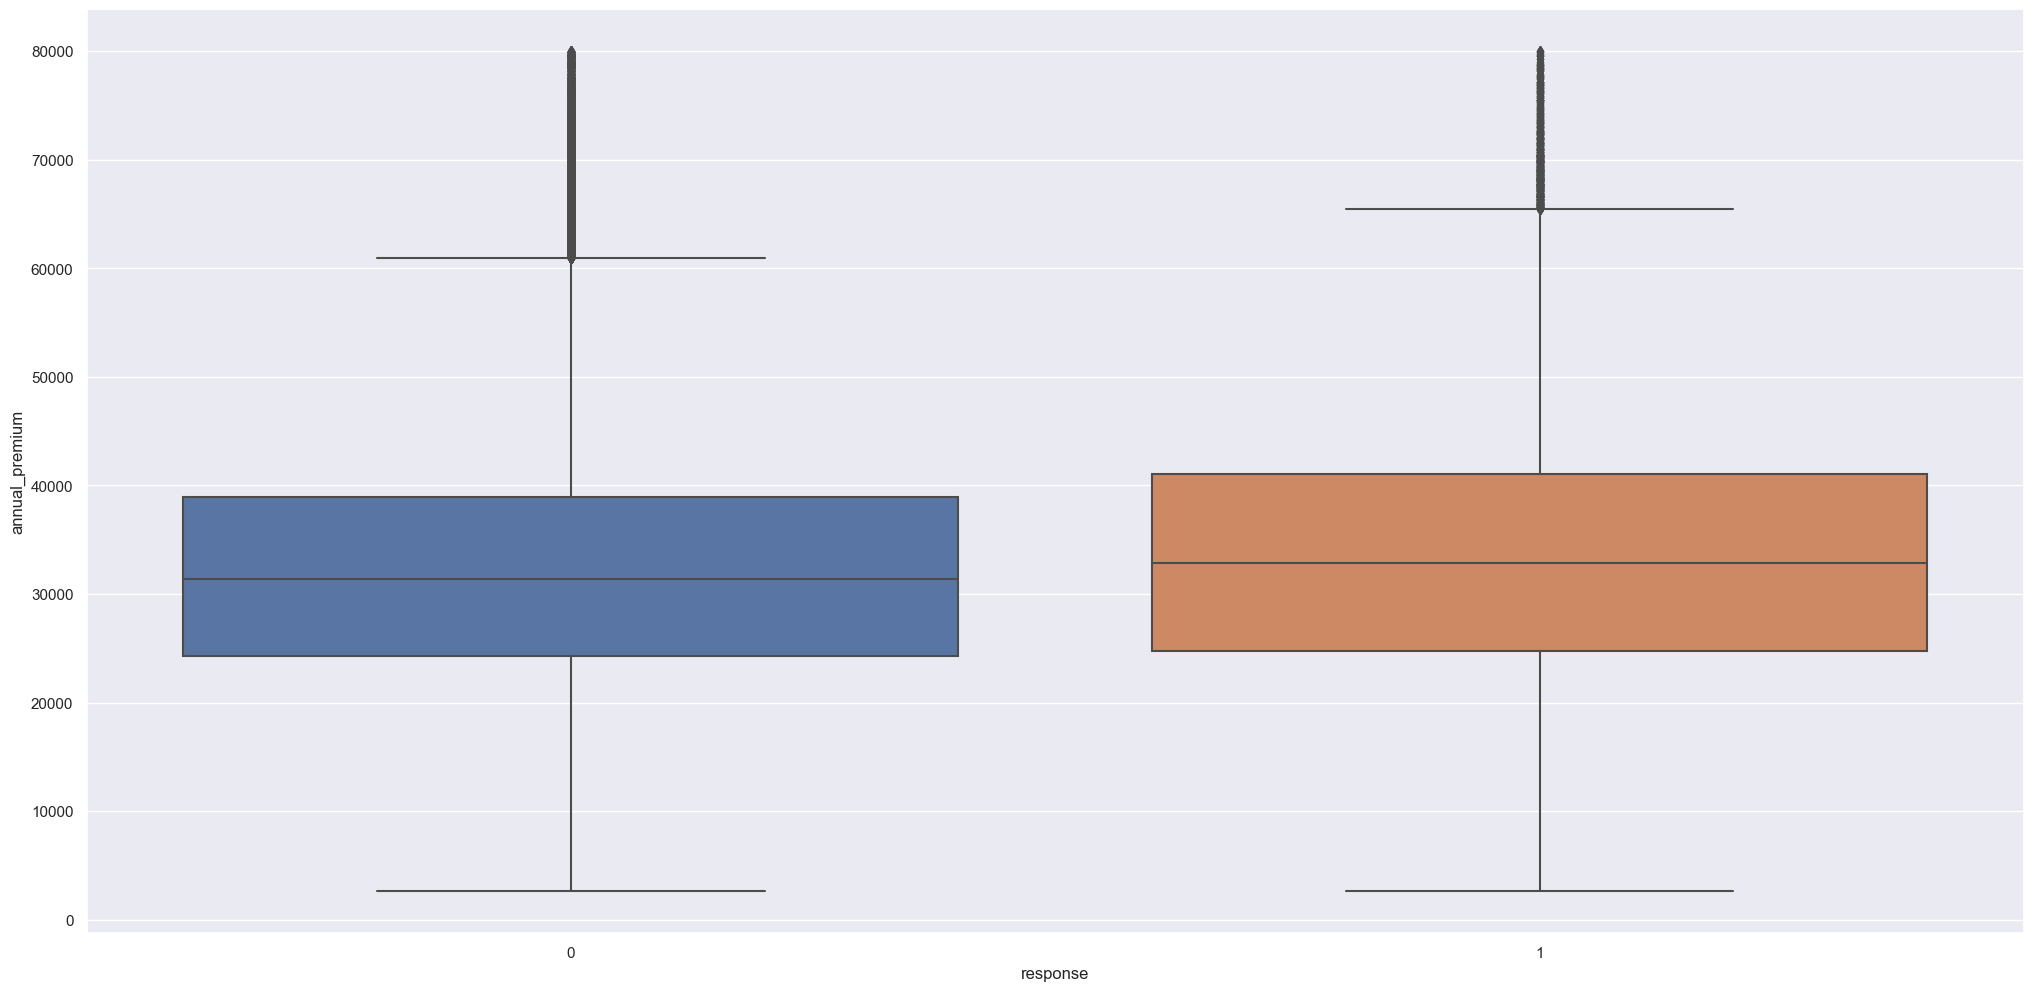

In [21]:
# Anual premium
aux = df4[df4['annual_premium'] < 80000] # because of outlier filtering annual premium
sns.boxplot(x = 'response', y = 'annual_premium', data = aux)



<Axes: xlabel='annual_premium', ylabel='Count'>

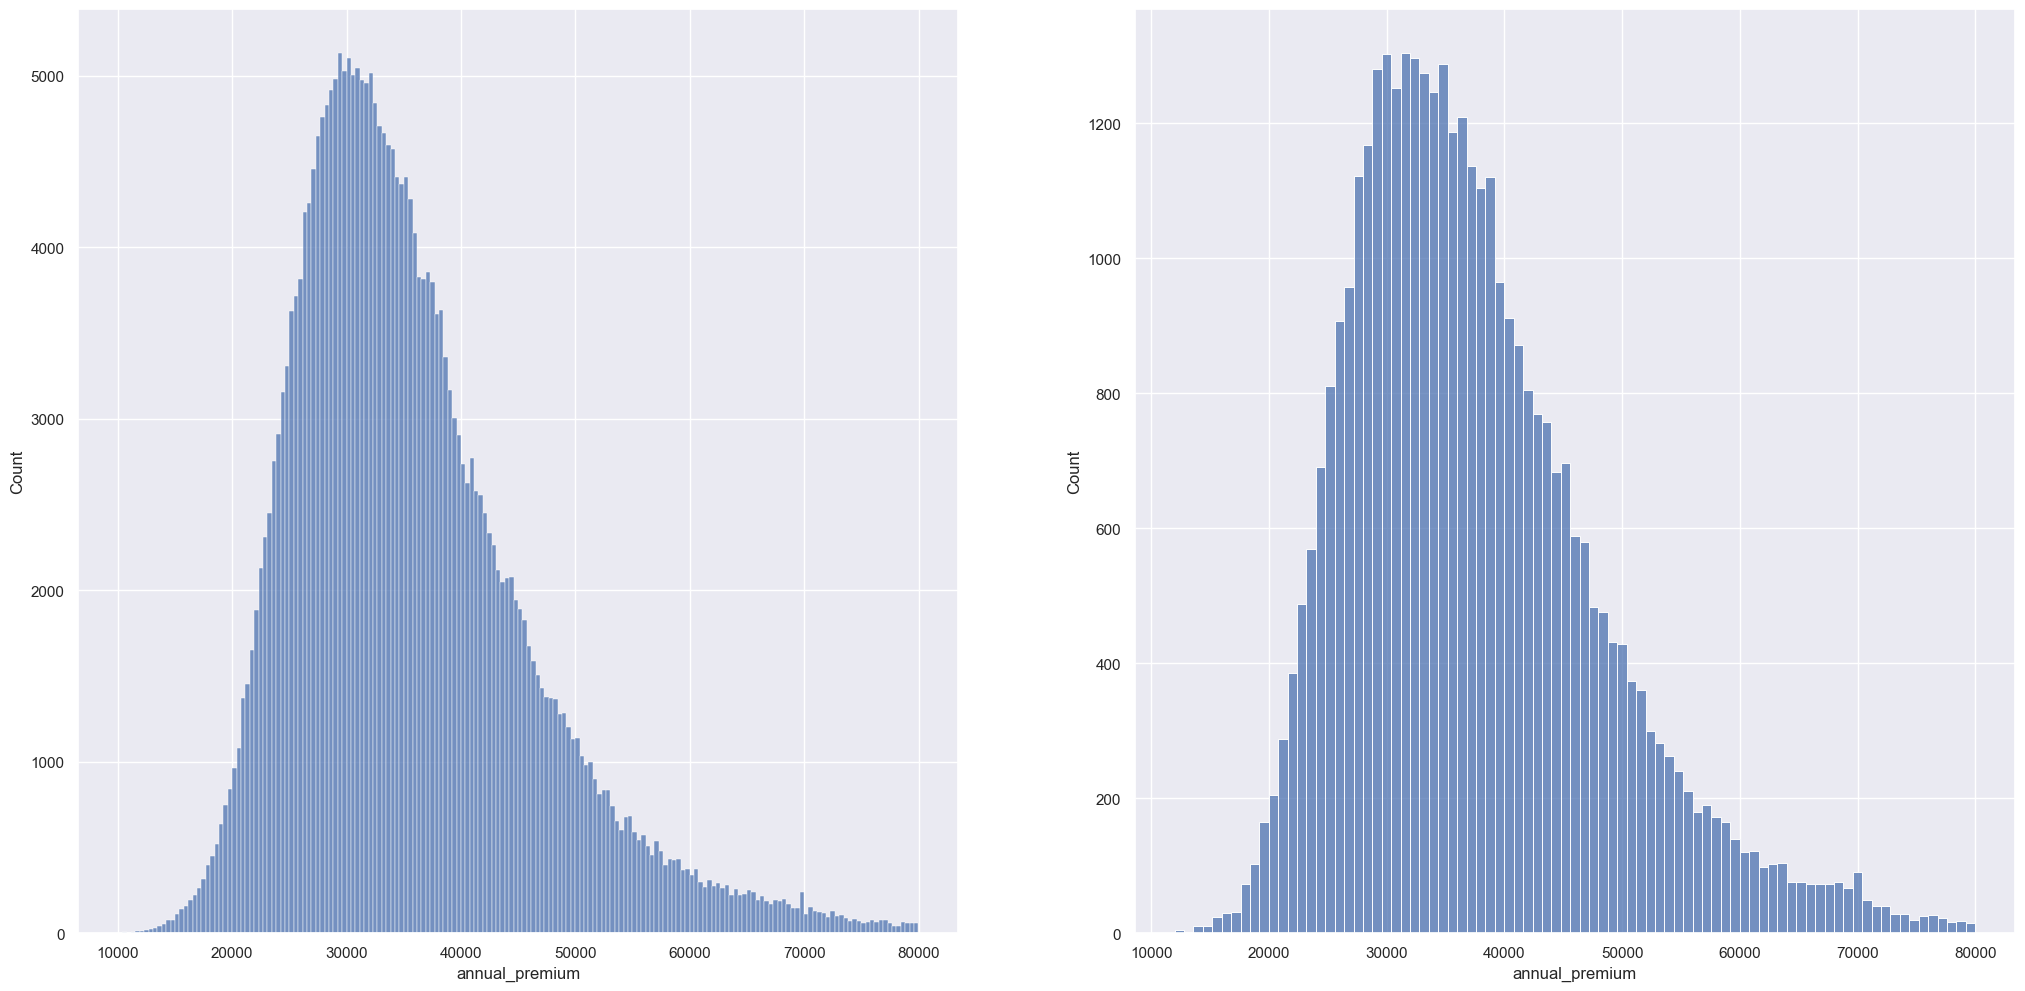

In [22]:
plt.subplot(1,2,1)
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)] 
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

plt.subplot(1,2,2)
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)] 
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

In [23]:
# driving licence, contingency table 
df4[['driving_license', 'response']].value_counts().reset_index()


# aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
# sns.barplot(x = 'response', y='driving_license', data = aux )
# plt.legend()

,driving_license,response,0
0,1,0,333628
1,1,1,46669
2,0,0,771
3,0,1,41


<Axes: xlabel='region_code', ylabel='id'>

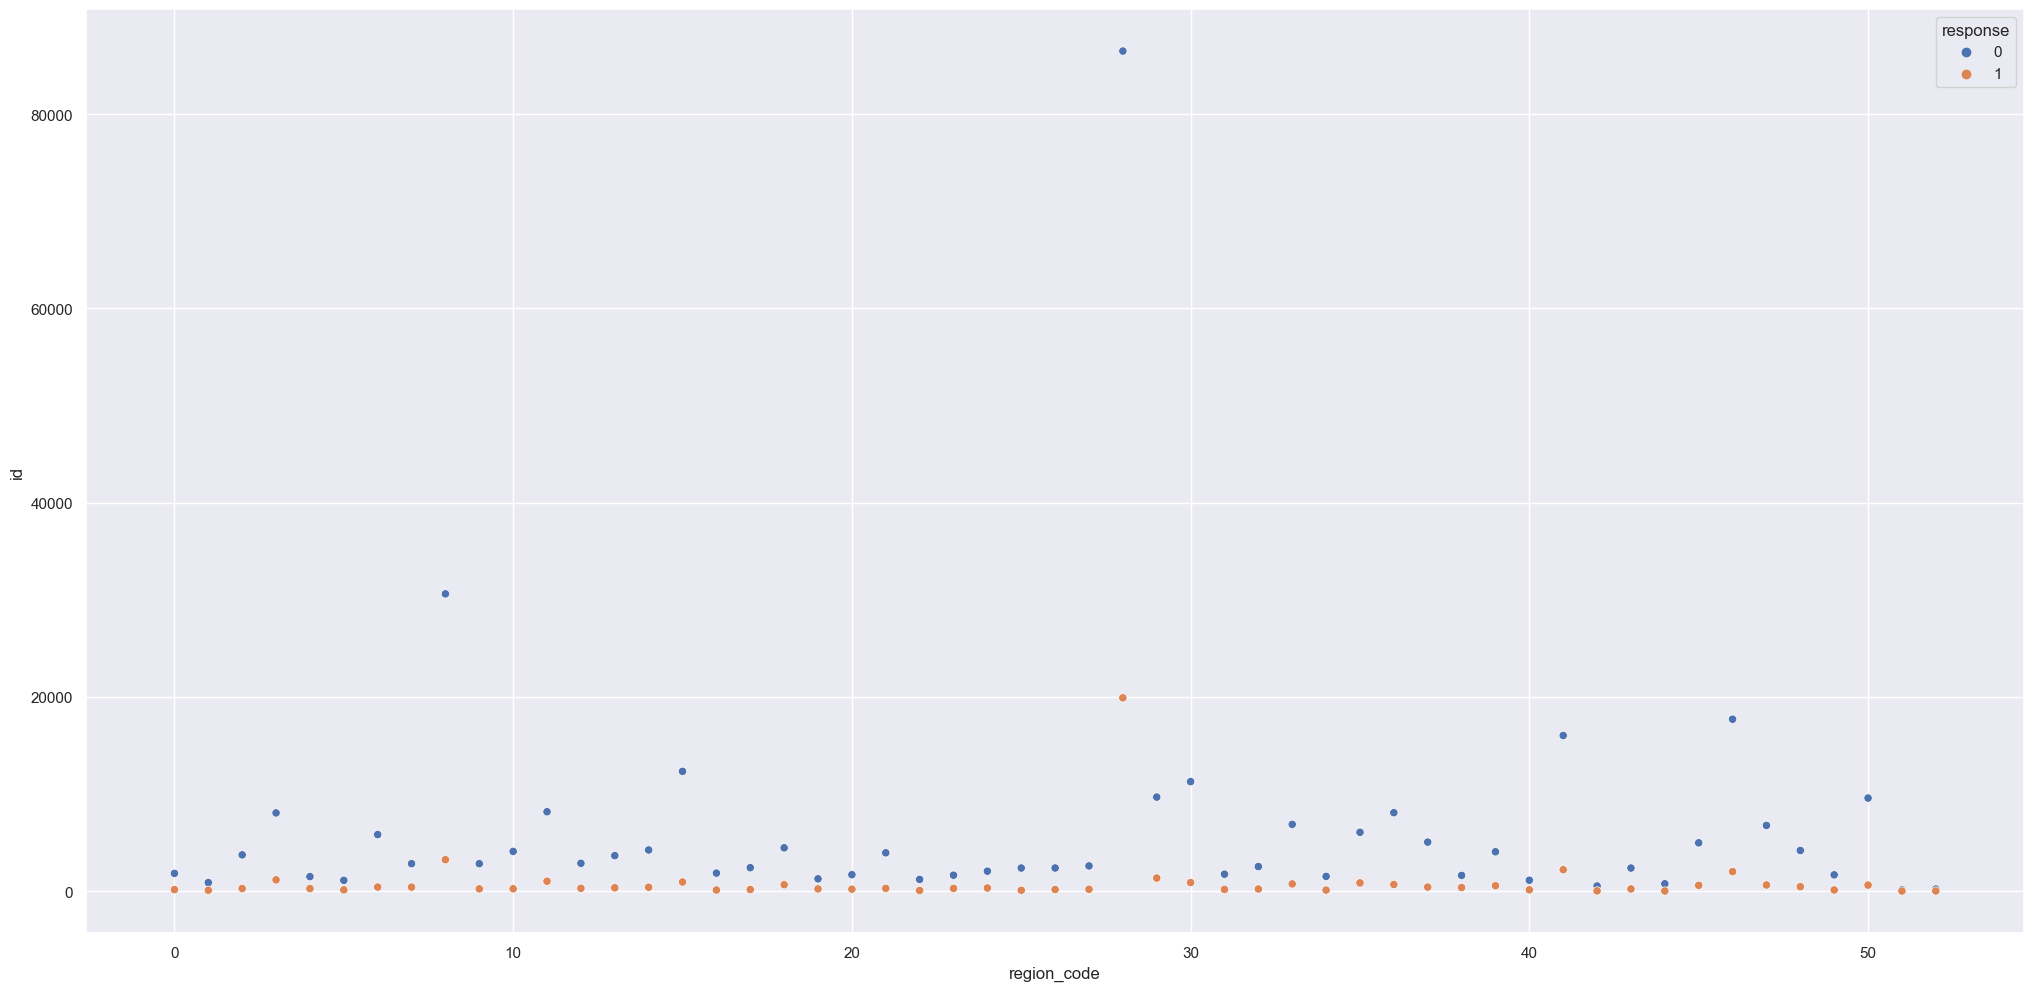

In [24]:
# regioncode

aux0 = df4[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

sns.scatterplot(x = 'region_code', y = 'id', hue = 'response', data = aux0)


In [25]:
# previously insured

pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis= 1)


response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [26]:
# vehicle age

df4[['vehicle_age', 'response']].value_counts(normalize = True).reset_index().sort_values(by='response')

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,less_than_1_year,0,0.413488
3,over_2_years,0,0.029663
2,between_1_2_year,1,0.091328
4,less_than_1_year,1,0.018897
5,over_2_years,1,0.012338


In [27]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

<Axes: xlabel='response', ylabel='policy_sales_channel'>

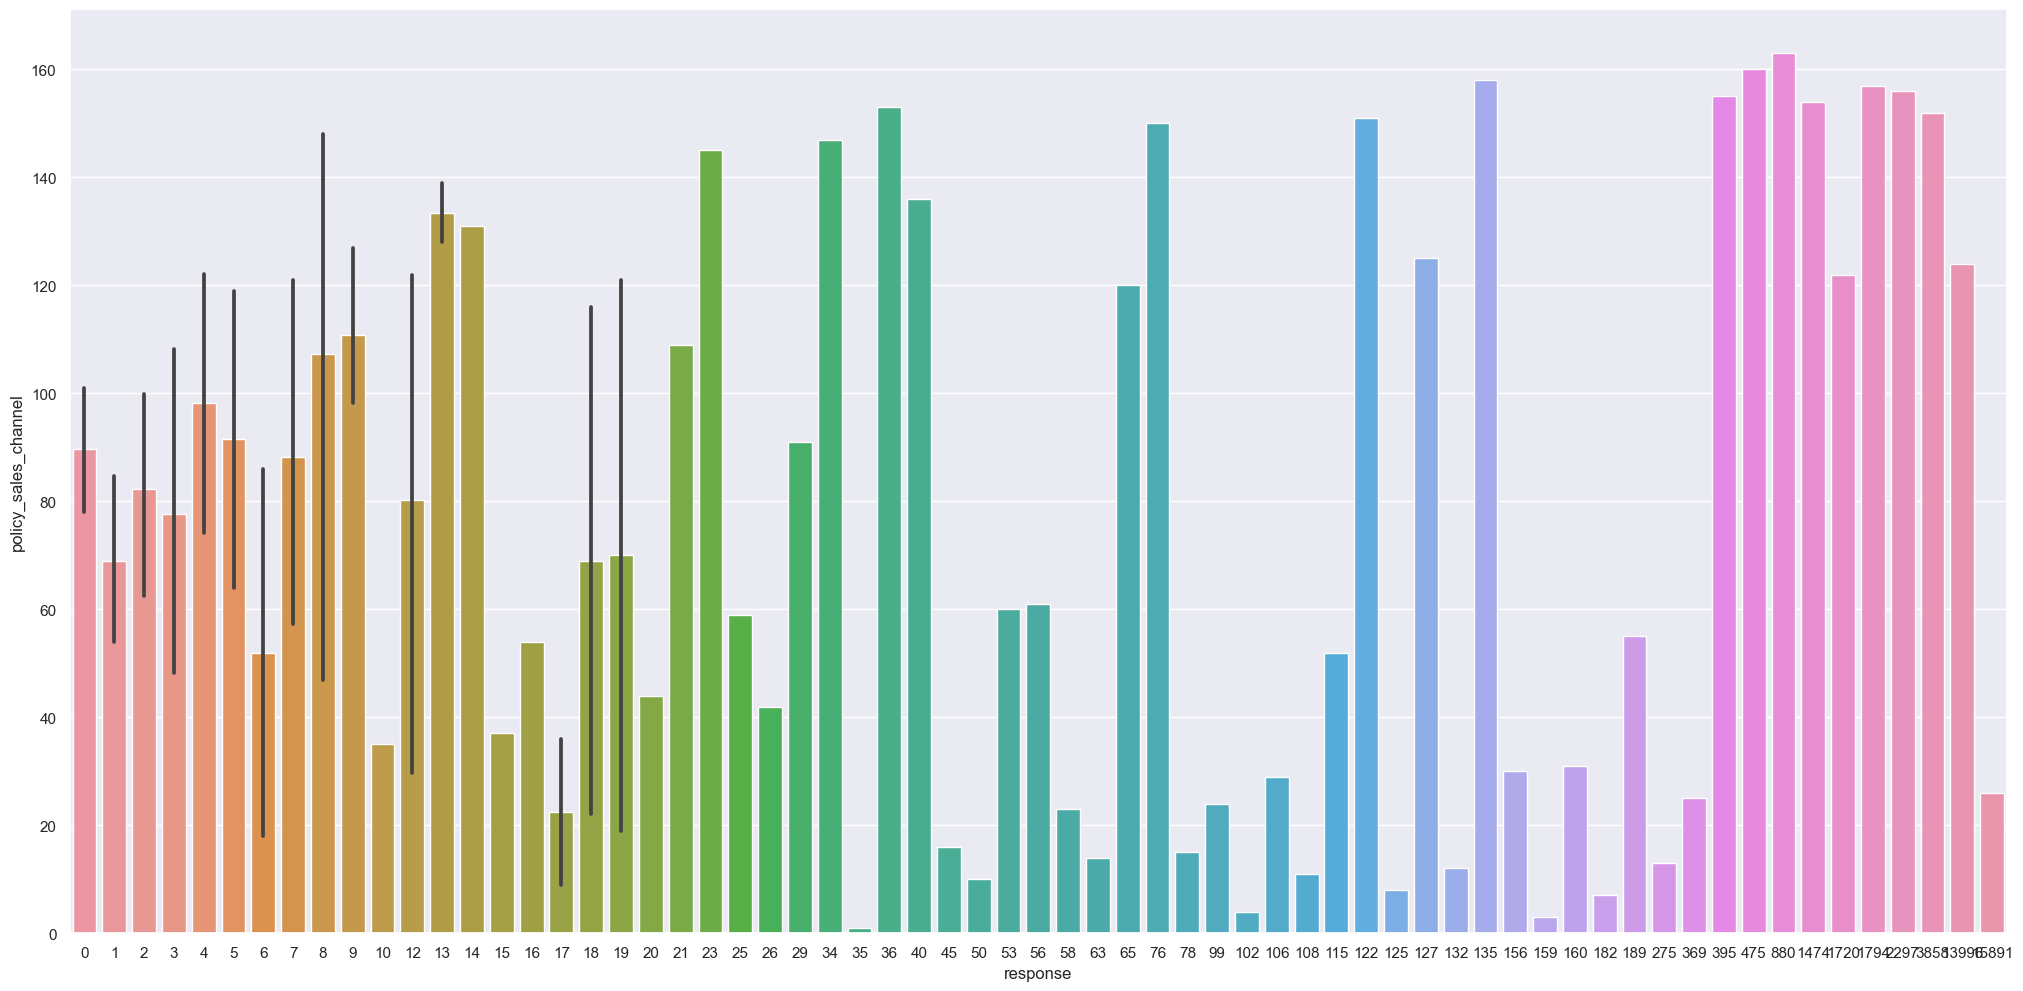

In [28]:
# policy_sales_channel

aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x= 'response', y='policy_sales_channel', data = aux)

<Axes: xlabel='response', ylabel='vintage'>

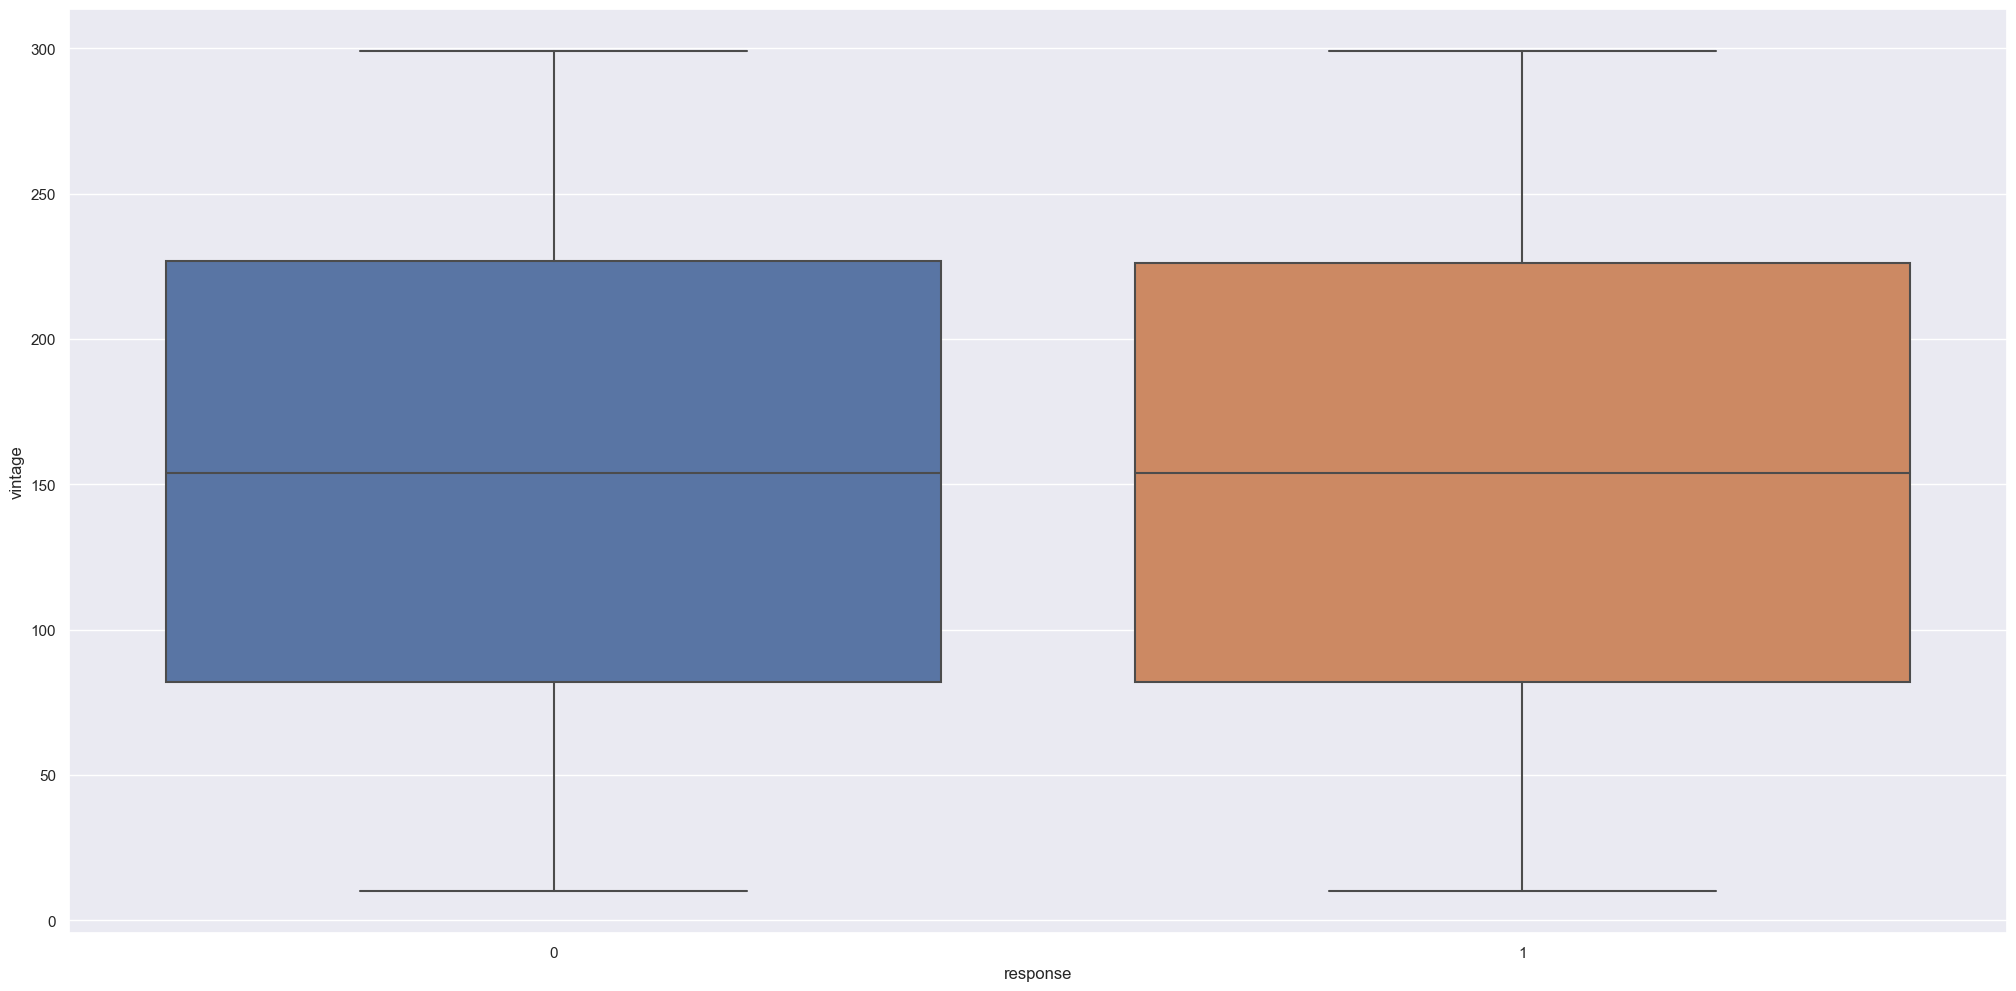

In [29]:
# vintage

sns.boxplot(x='response', y = 'vintage', data = df4)

# df4['vintage']

<Axes: xlabel='vintage', ylabel='Count'>

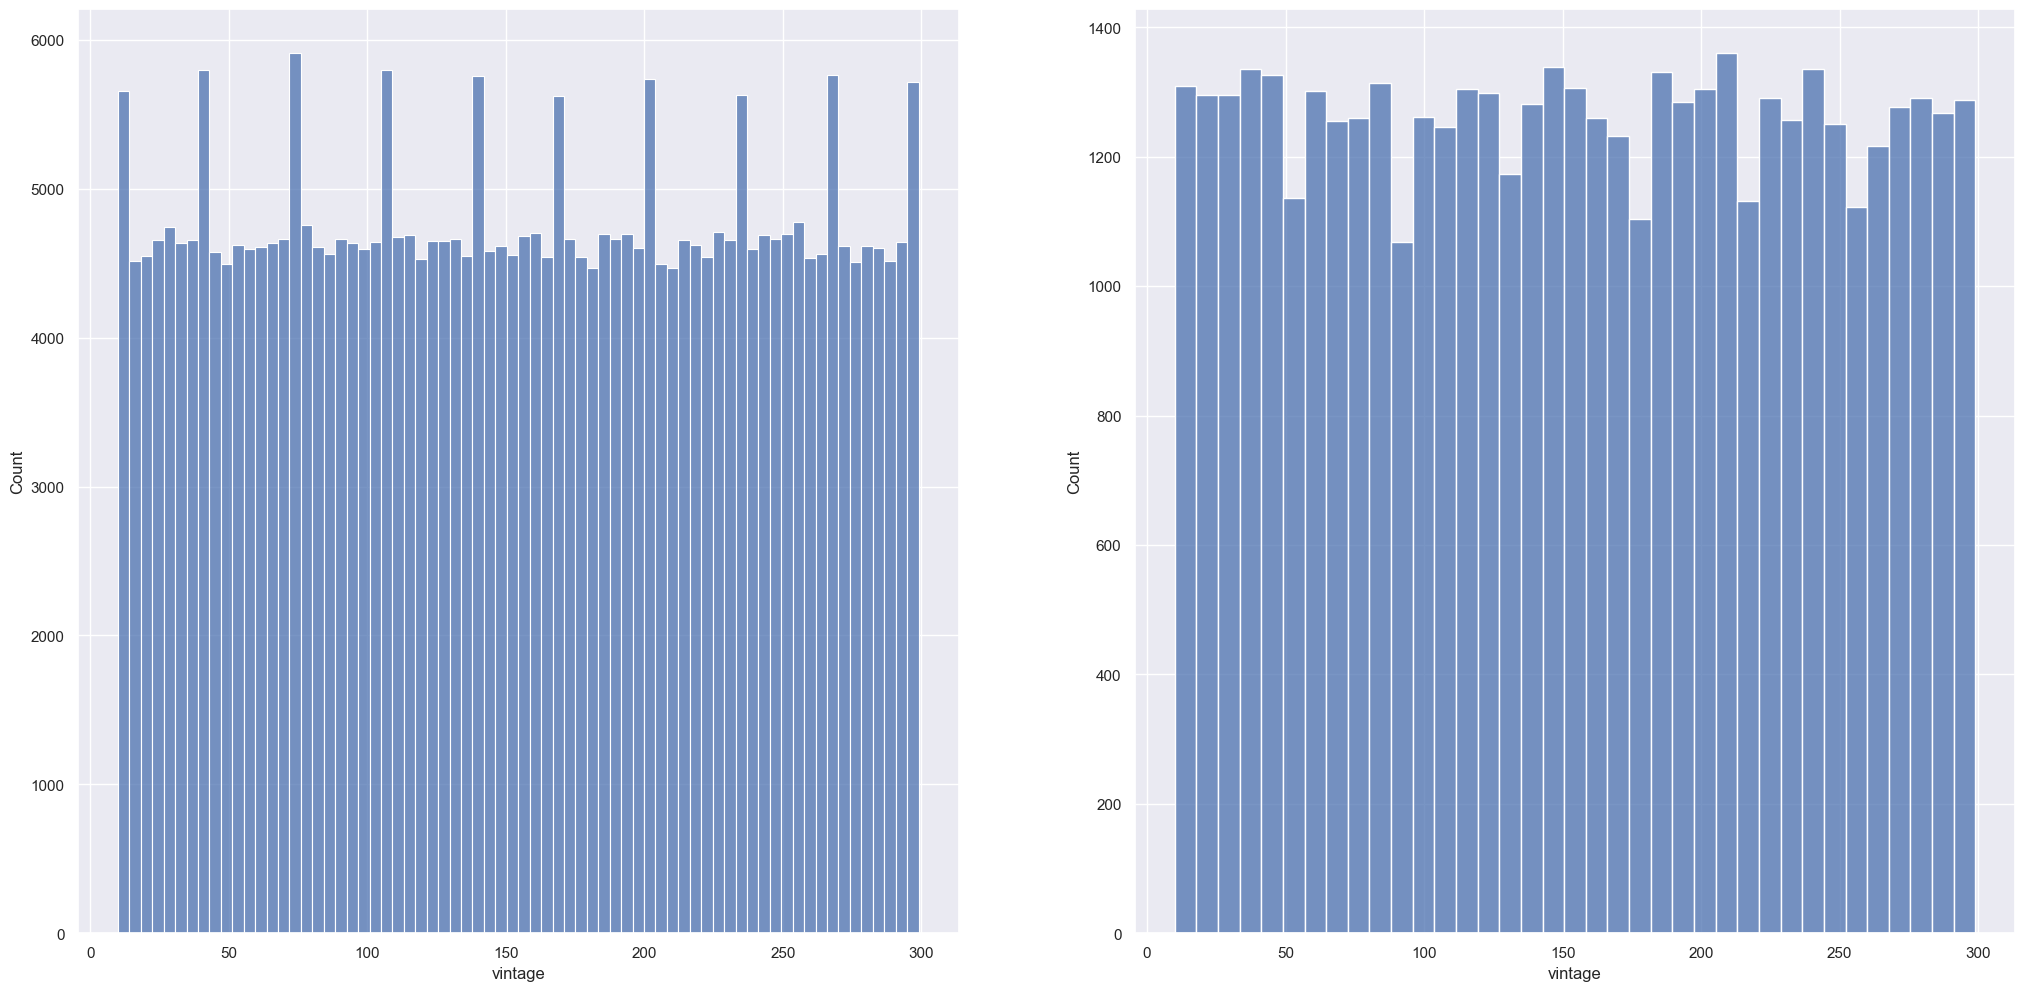

In [30]:
plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] ==0, 'vintage']
sns.histplot(aux00)

plt.subplot(1,2,2)
aux00 = df4.loc[df4['response'] ==1, 'vintage']
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='gender'>

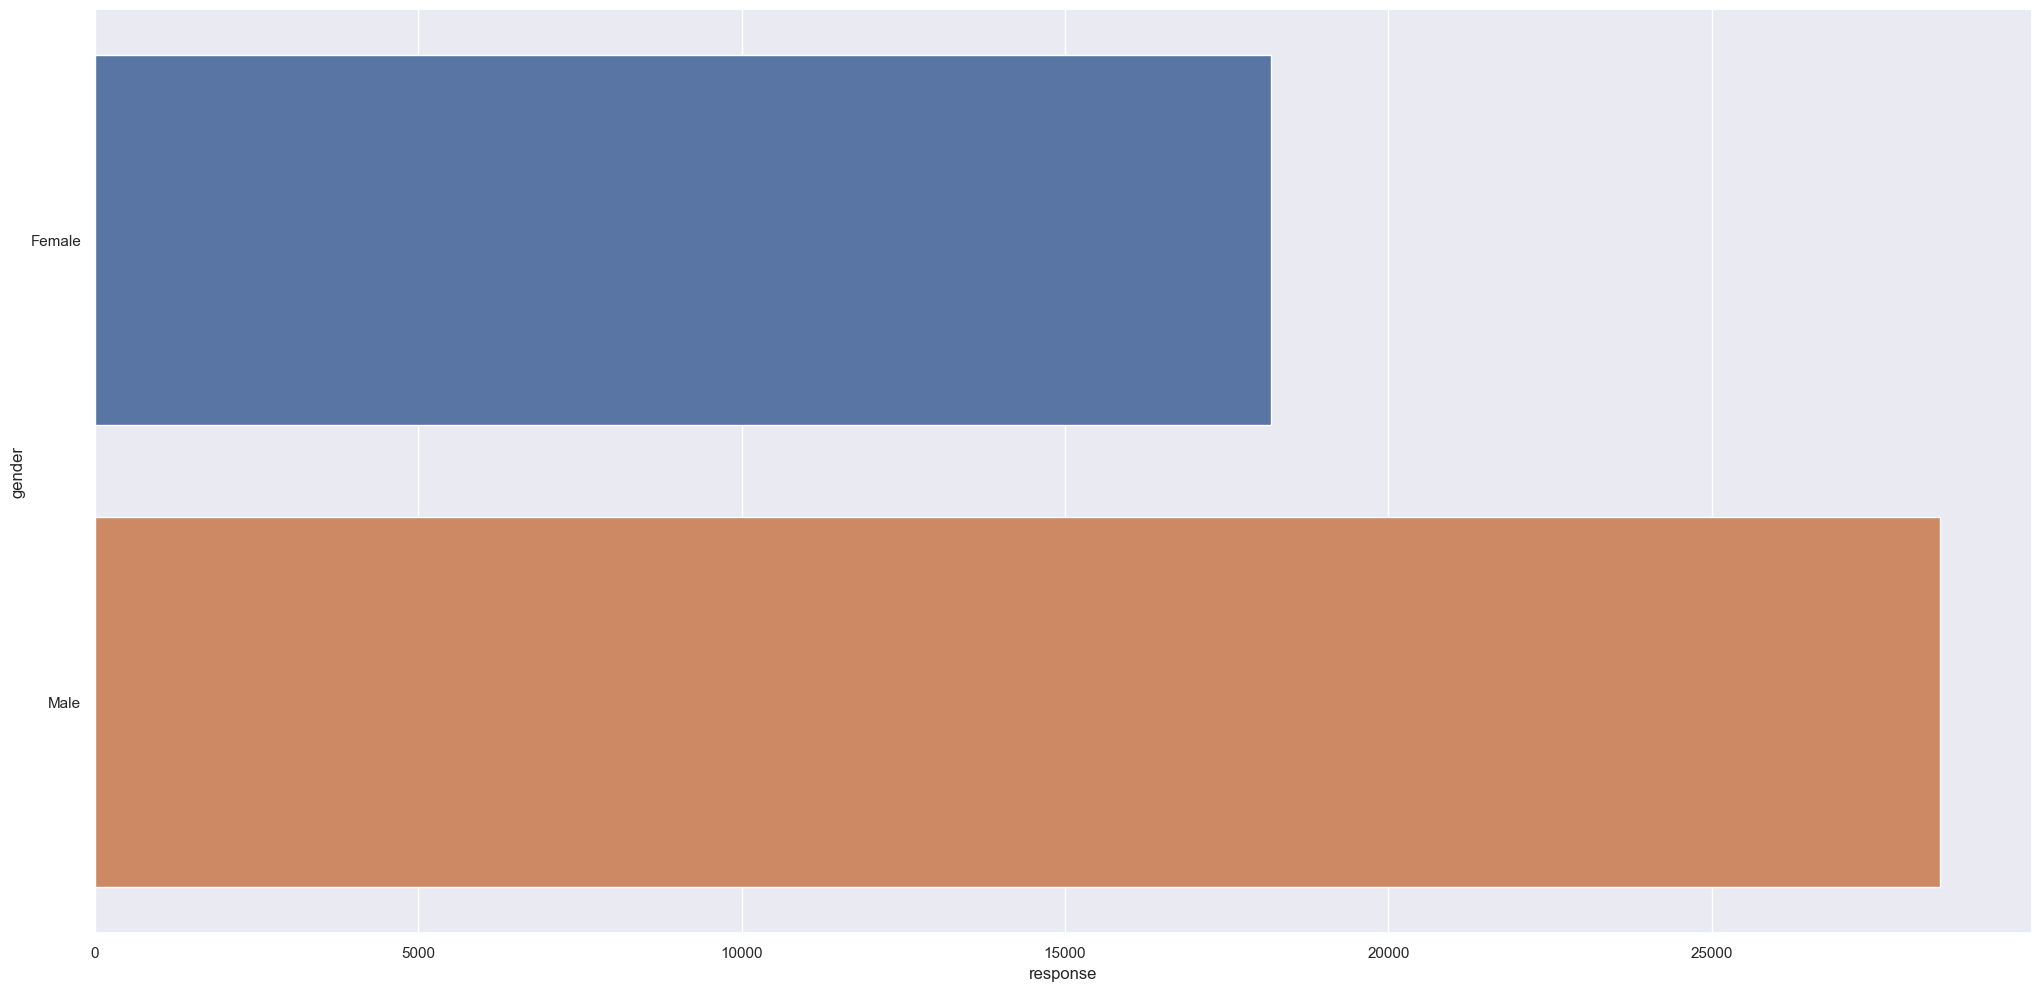

In [31]:
# gender
aux = df4[['gender', 'response']].groupby('gender').sum().reset_index()
sns.barplot(x= 'response', y='gender', data = aux)


# 5.0 Data preparation

In [32]:
df5 = df4.copy()

In [33]:
X = df4.drop('response', axis = 1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size = 0.20)

df5 = pd.concat([x_train, y_train], axis = 1)

In [34]:
# sns.histplot(df5['response'])

### Standartization

In [67]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)
pickle.dump(ss, open('/Users/franciscocaetano/Documents/Data Science/Health_Insurance_Cross_Sell/health_insurance_cross_sell/src/features/annual_premium_scaler.pkl', 'wb'))

### Rescaling

In [36]:
# storing the minmax to transform on the validation variable
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)
# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)


### Encoder

In [37]:

# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] =  df5.loc[:, 'gender'].map( target_encode_gender )

# region_code - Frequency Encoding / Target Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] =  df5.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Frequency Encoding / Target Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5.loc[:, 'policy_sales_channel'].map( fe_policy_sales_channel )

/var/folders/q6/zrgkgk0n1bq299dy6f_z2yvm0000gn/T/ipykernel_32776/1152245750.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:, 'gender'] =  df5.loc[:, 'gender'].map( target_encode_gender )


## 5.4 Validation Preparation

Apply all transformation implementing on the test data to validation data, it means, all stadartization, encode, and rescaling.

In [38]:
 # gender
x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )


/var/folders/q6/zrgkgk0n1bq299dy6f_z2yvm0000gn/T/ipykernel_32776/3242298615.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )


# 6.0 Feature Selection

## 6.1 Feature Importance

In [39]:
# Model definition

forest = en.ExtraTreesClassifier(n_estimators =250, random_state = 0, n_jobs = -1)

# data prep
x_train_n = df5.drop(['id', 'response'], axis =1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking
                        feature  importance
0                       vintage    0.273574
0                annual_premium    0.244814
0                           age    0.164250
0                   region_code    0.106372
0                vehicle_damage    0.067843
0          policy_sales_channel    0.059853
0            previously_insured    0.056340
0  vehicle_age_less_than_1_year    0.013417
0  vehicle_age_between_1_2_year    0.006312
0                        gender    0.004564
0      vehicle_age_over_2_years    0.002168
0               driving_license    0.000494


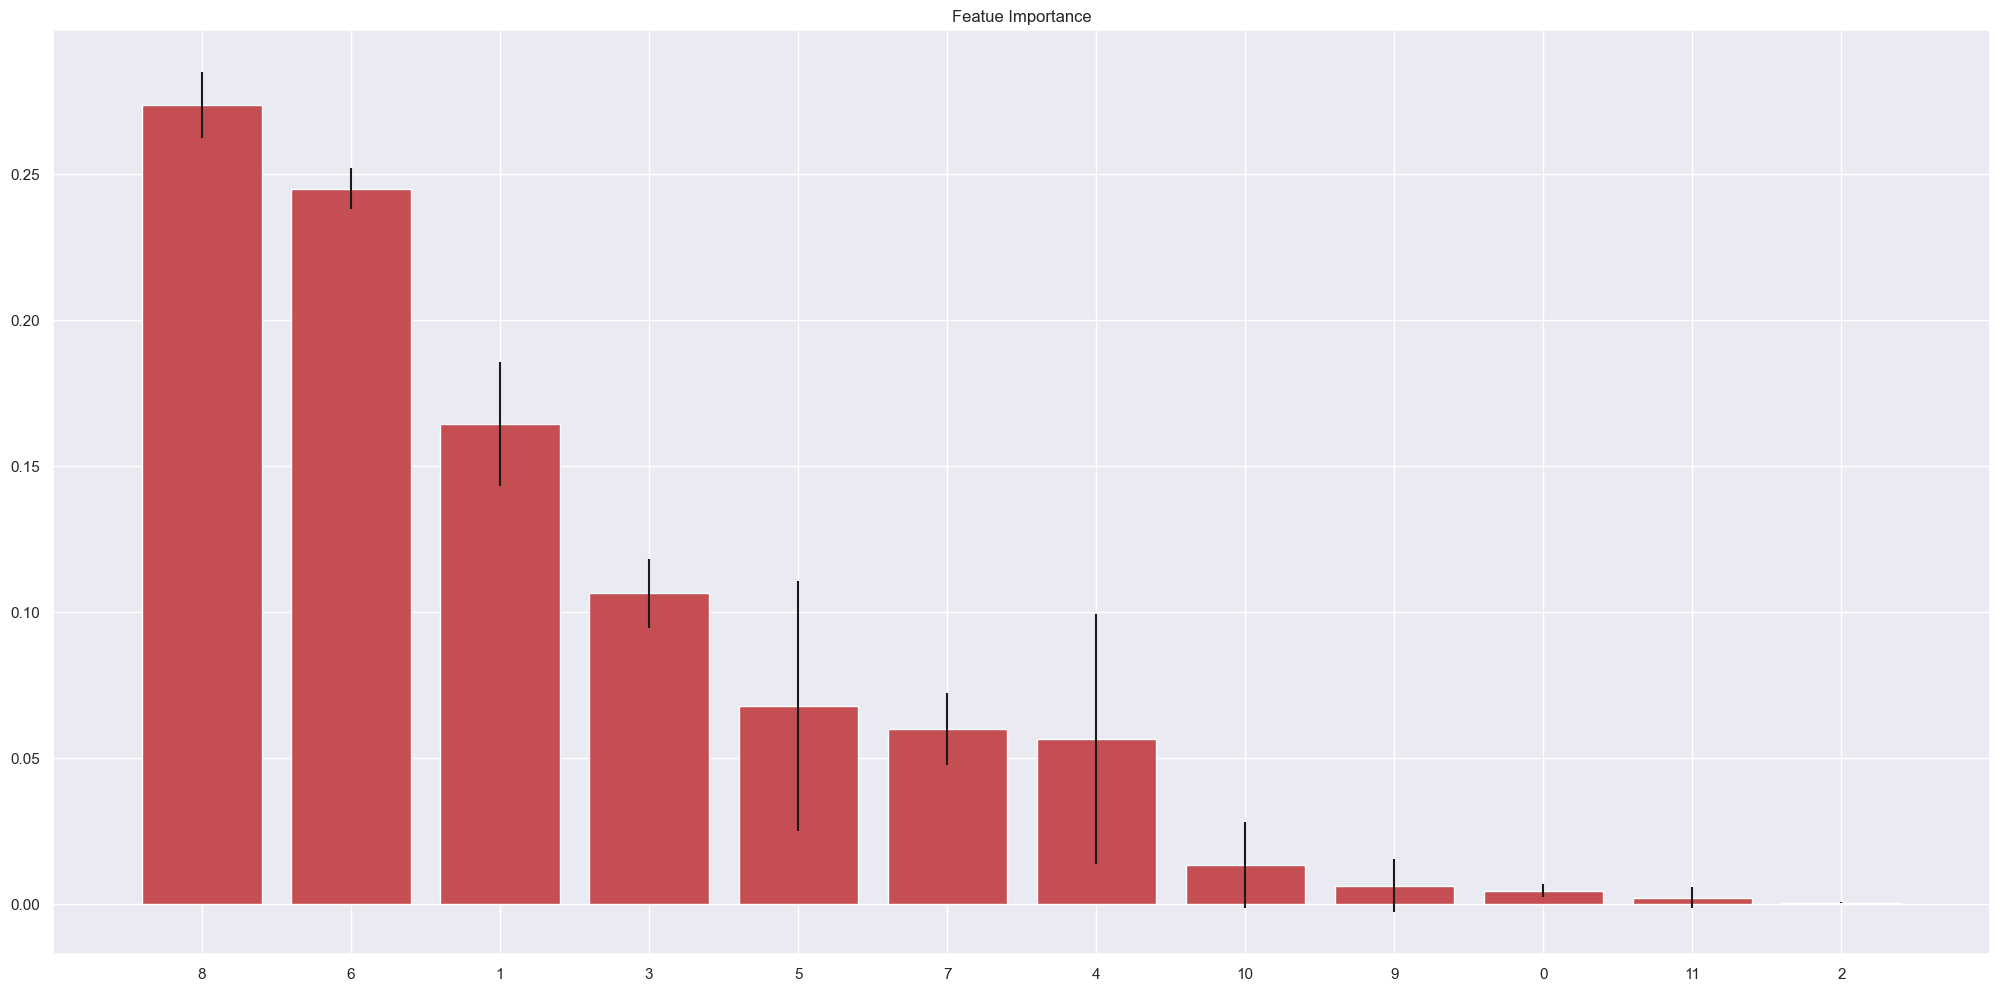

In [40]:
importances  = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# print the feature ranking


print('Feature Ranking')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df,aux], axis = 0)

print(df.sort_values('importance', ascending=False))

# Plot the impurity-based feature importance of the forest


plt.figure()
plt.title("Featue Importance")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr = std[indices], align = "center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0 Machine Learning

In [41]:
cols_selected = ['annual_premium','vintage', 'age','region_code', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']


x_train = df5[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()


## 7.1 KNN

In [42]:
# n_neighbors, number of points to compare
knn_model = nh.KNeighborsClassifier(n_neighbors= 7)

# model training
knn_model.fit(x_train, y_train)

# model prediction
# prediction on the validation to see the power of GENERALIZATION 
yhat_knn = knn_model.predict_proba(x_val)

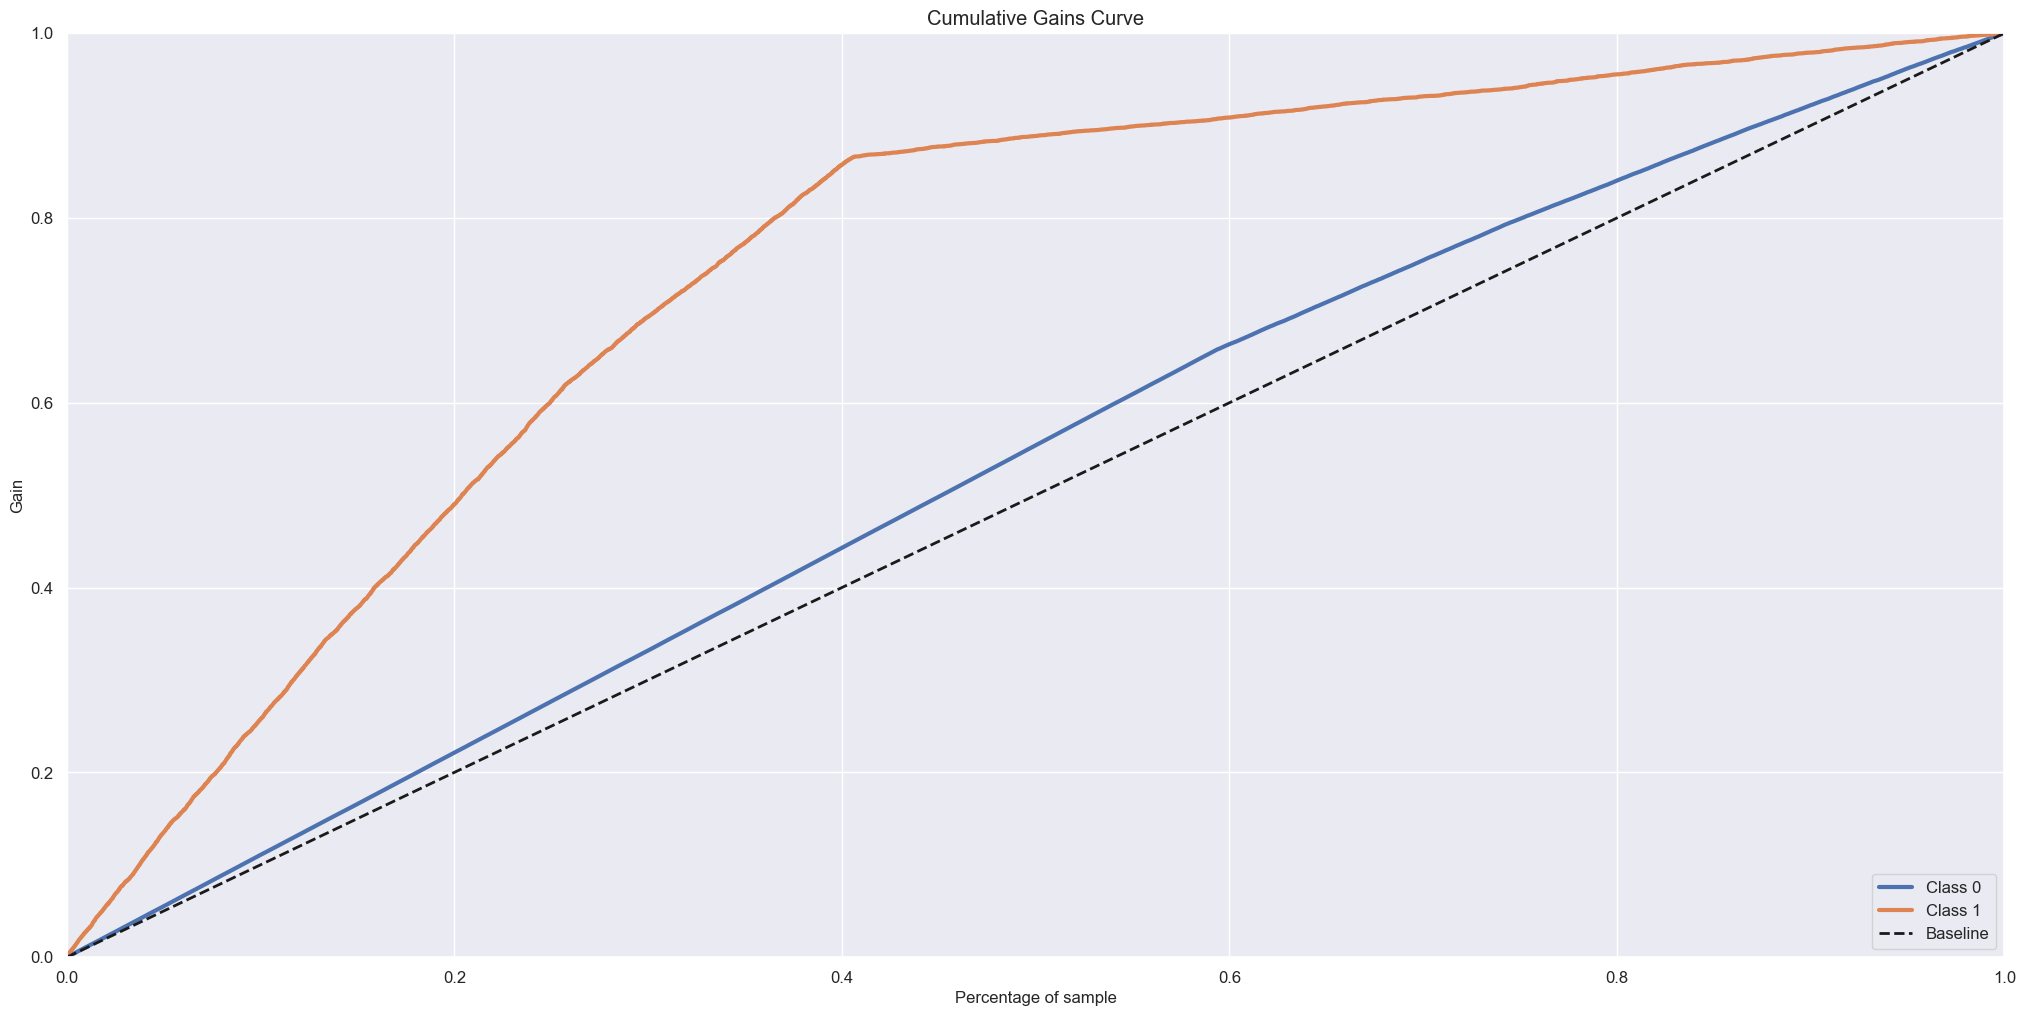

In [43]:
# Cumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn);

That means. if i ordenate the dataset, and take 40% of all, i will get more than 80% of class 1, class 1 is people who probably will acept the offer, and we neet to take 100% of the dataset to get all interessed, this because the Knn put interesed people on the final of the dataset, lets see logistic regression

###  7.2 Logistic Regression

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

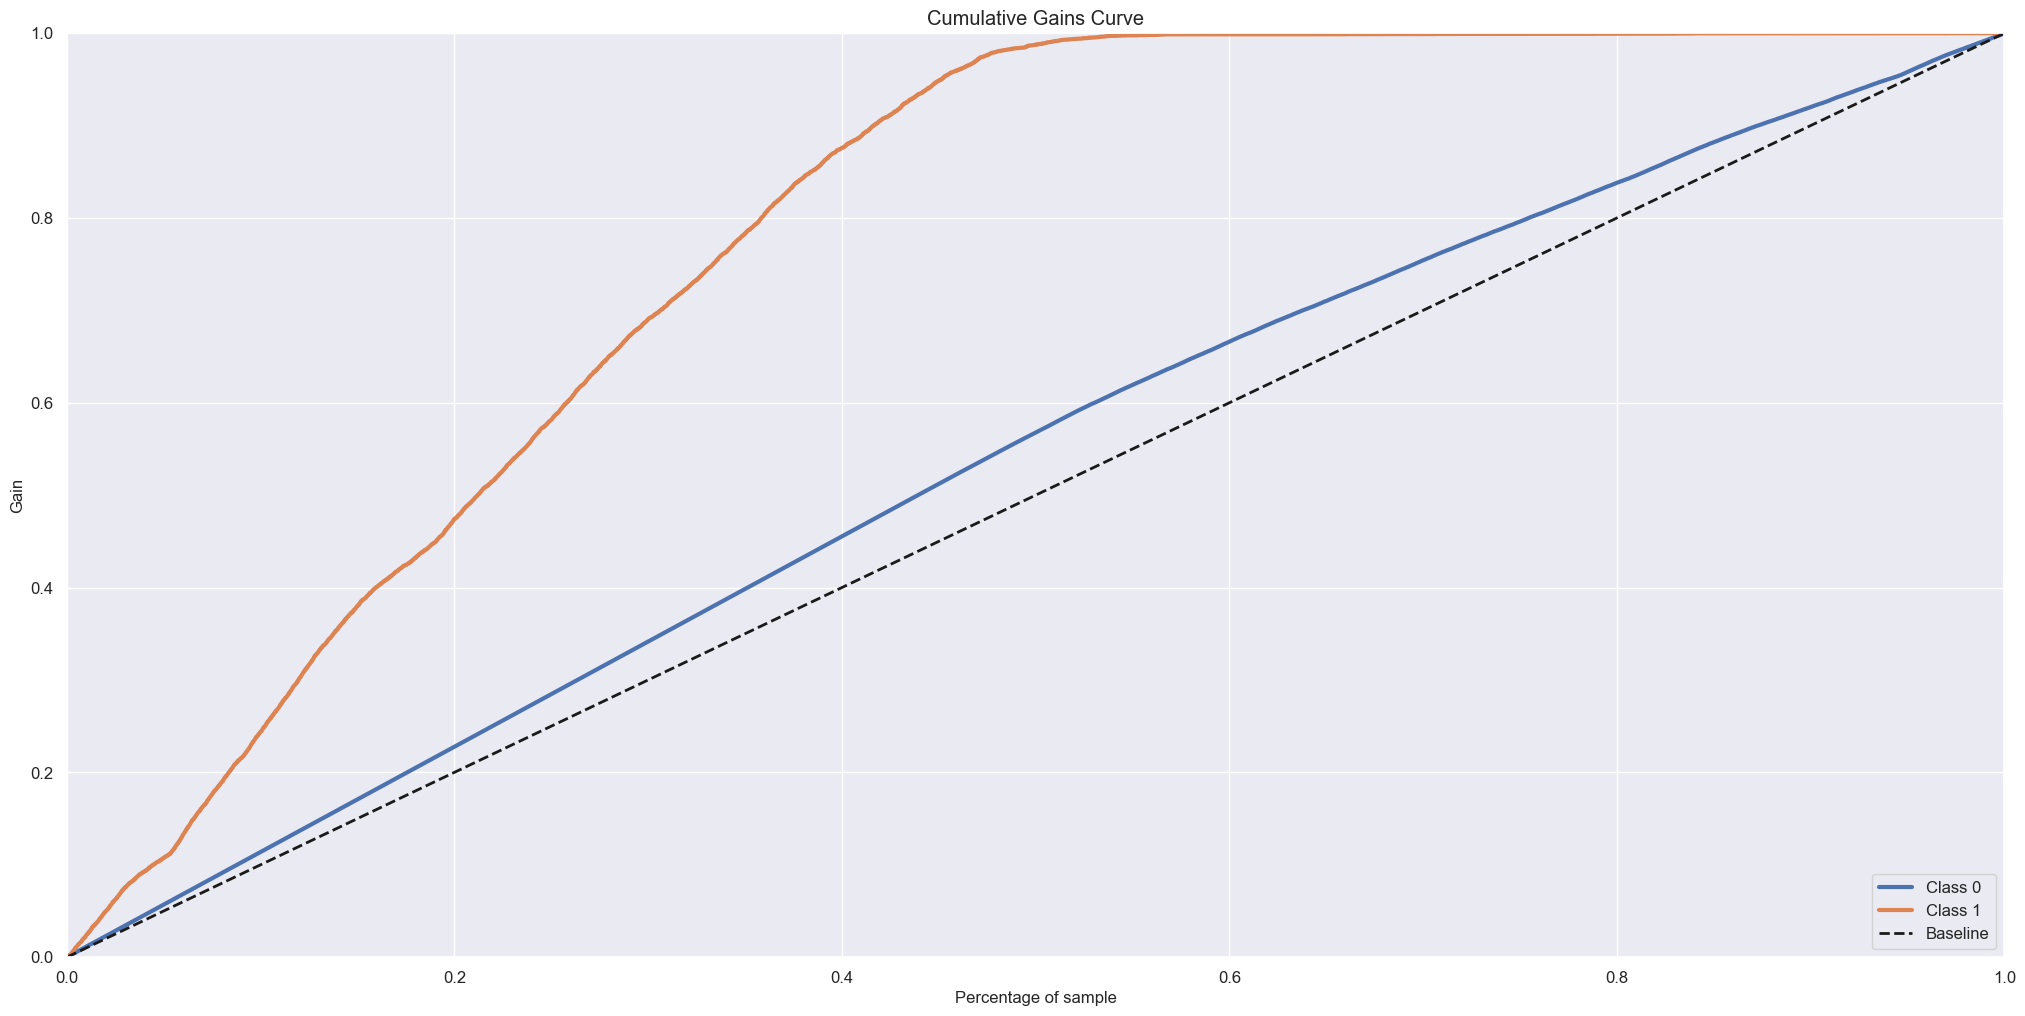

In [44]:
lr_model = lm.LogisticRegression(random_state = 42)

lr_model.fit(x_train, y_train)

yhat_lr = lr_model.predict_proba(x_val)

# Cumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)

On logistic regression, we just need to take 70% of the ordened dataset to get 100% of all interessed, so this is betther than Knn model 

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

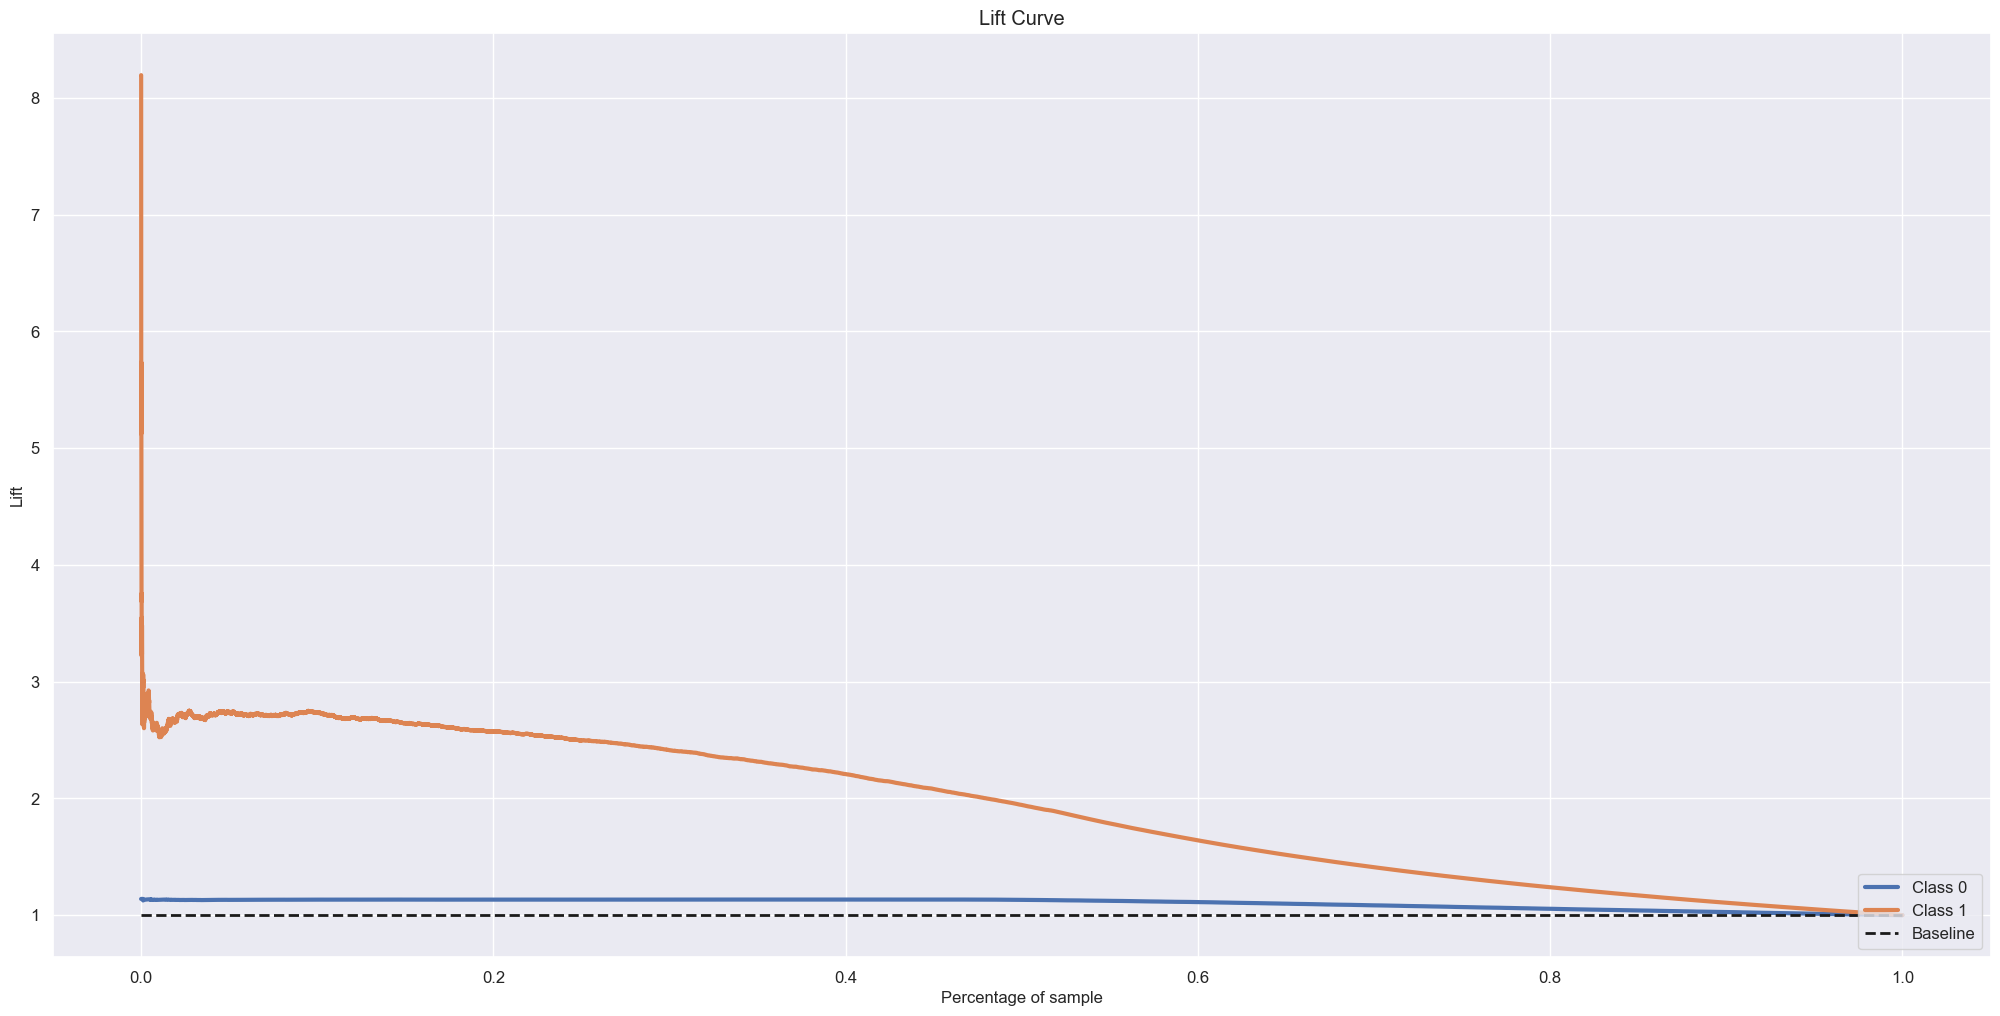

In [61]:
# Lift Curve 
skplt.metrics.plot_lift_curve(y_val, yhat_et )

## 7.2 Extra Trees

In [45]:
# model definition
et = en.ExtraTreesClassifier(n_estimators=100, n_jobs = -1, random_state = 42)

# model fit
et.fit(x_train, y_train)

#model predict
yhat_et = et.predict_proba(x_val)

In [46]:
#model predict
yhat_et = et.predict_proba(x_val)

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

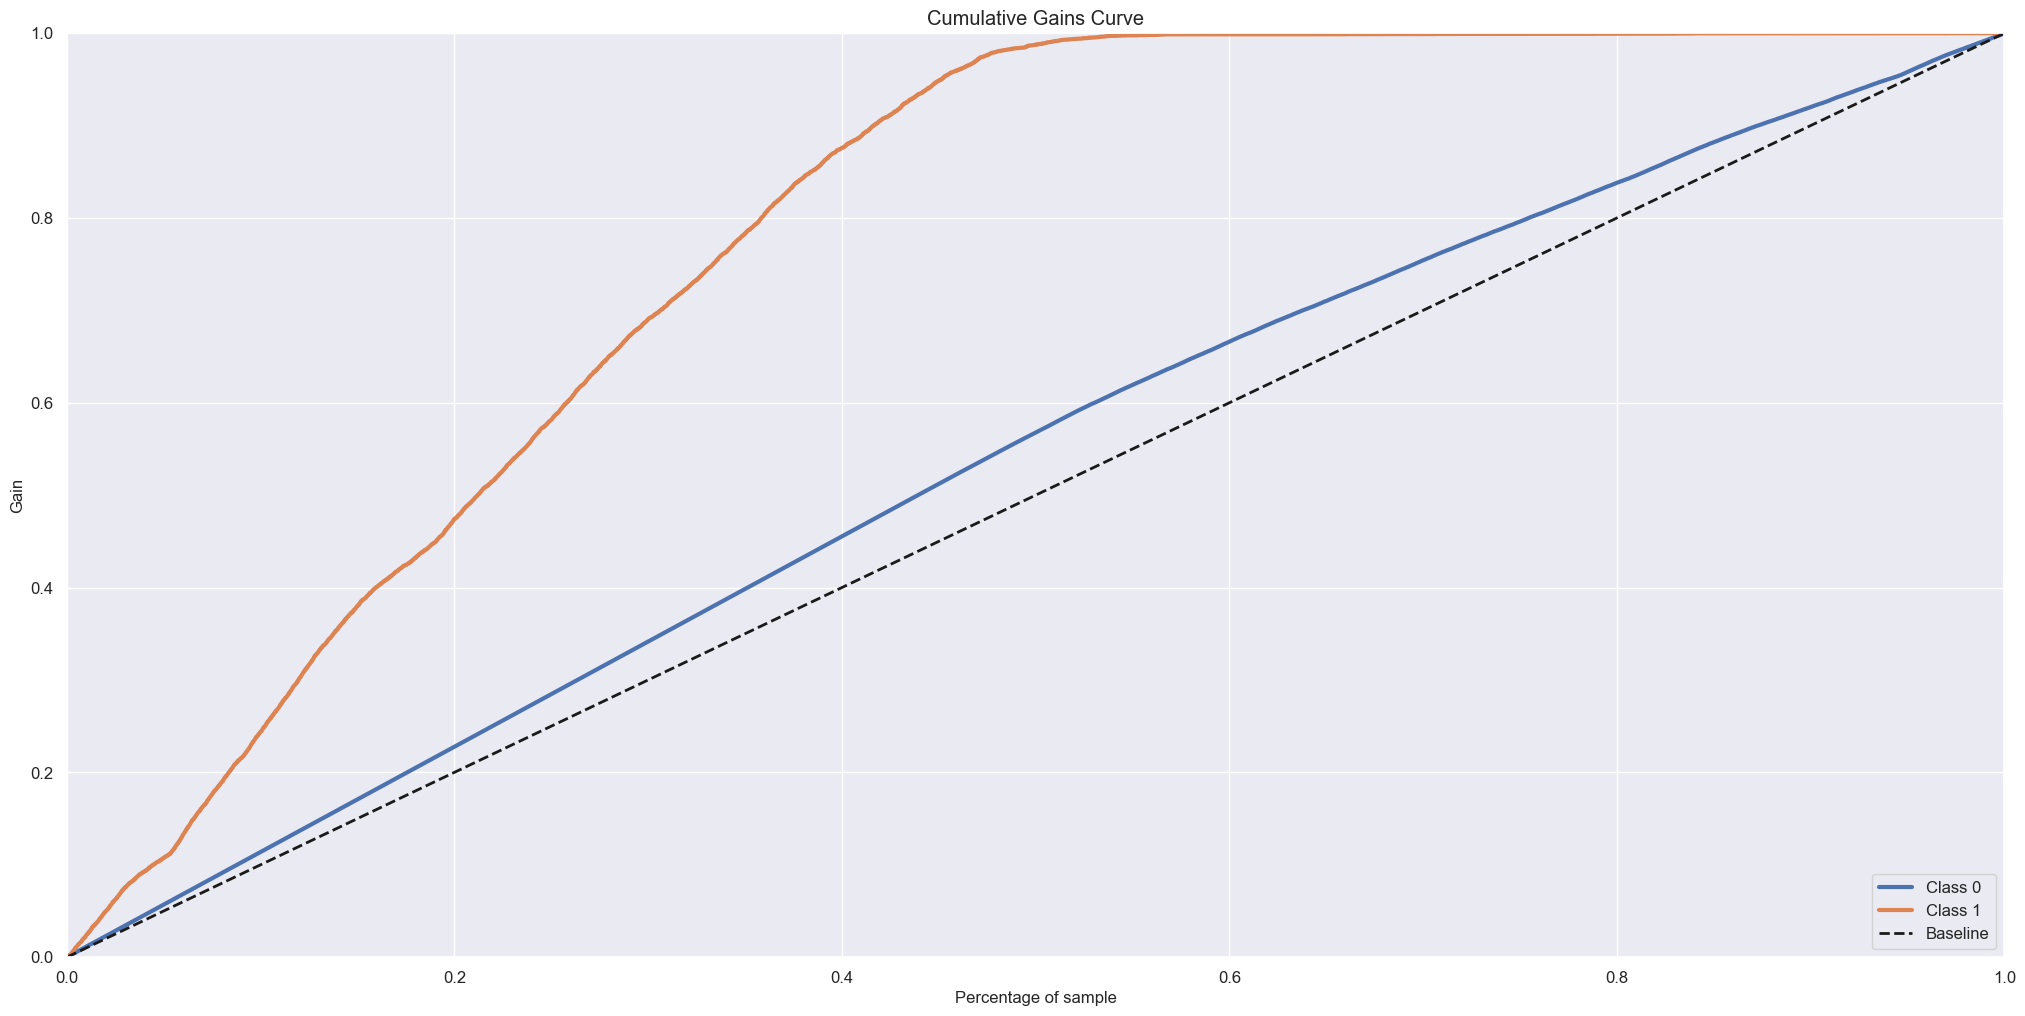

In [60]:
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

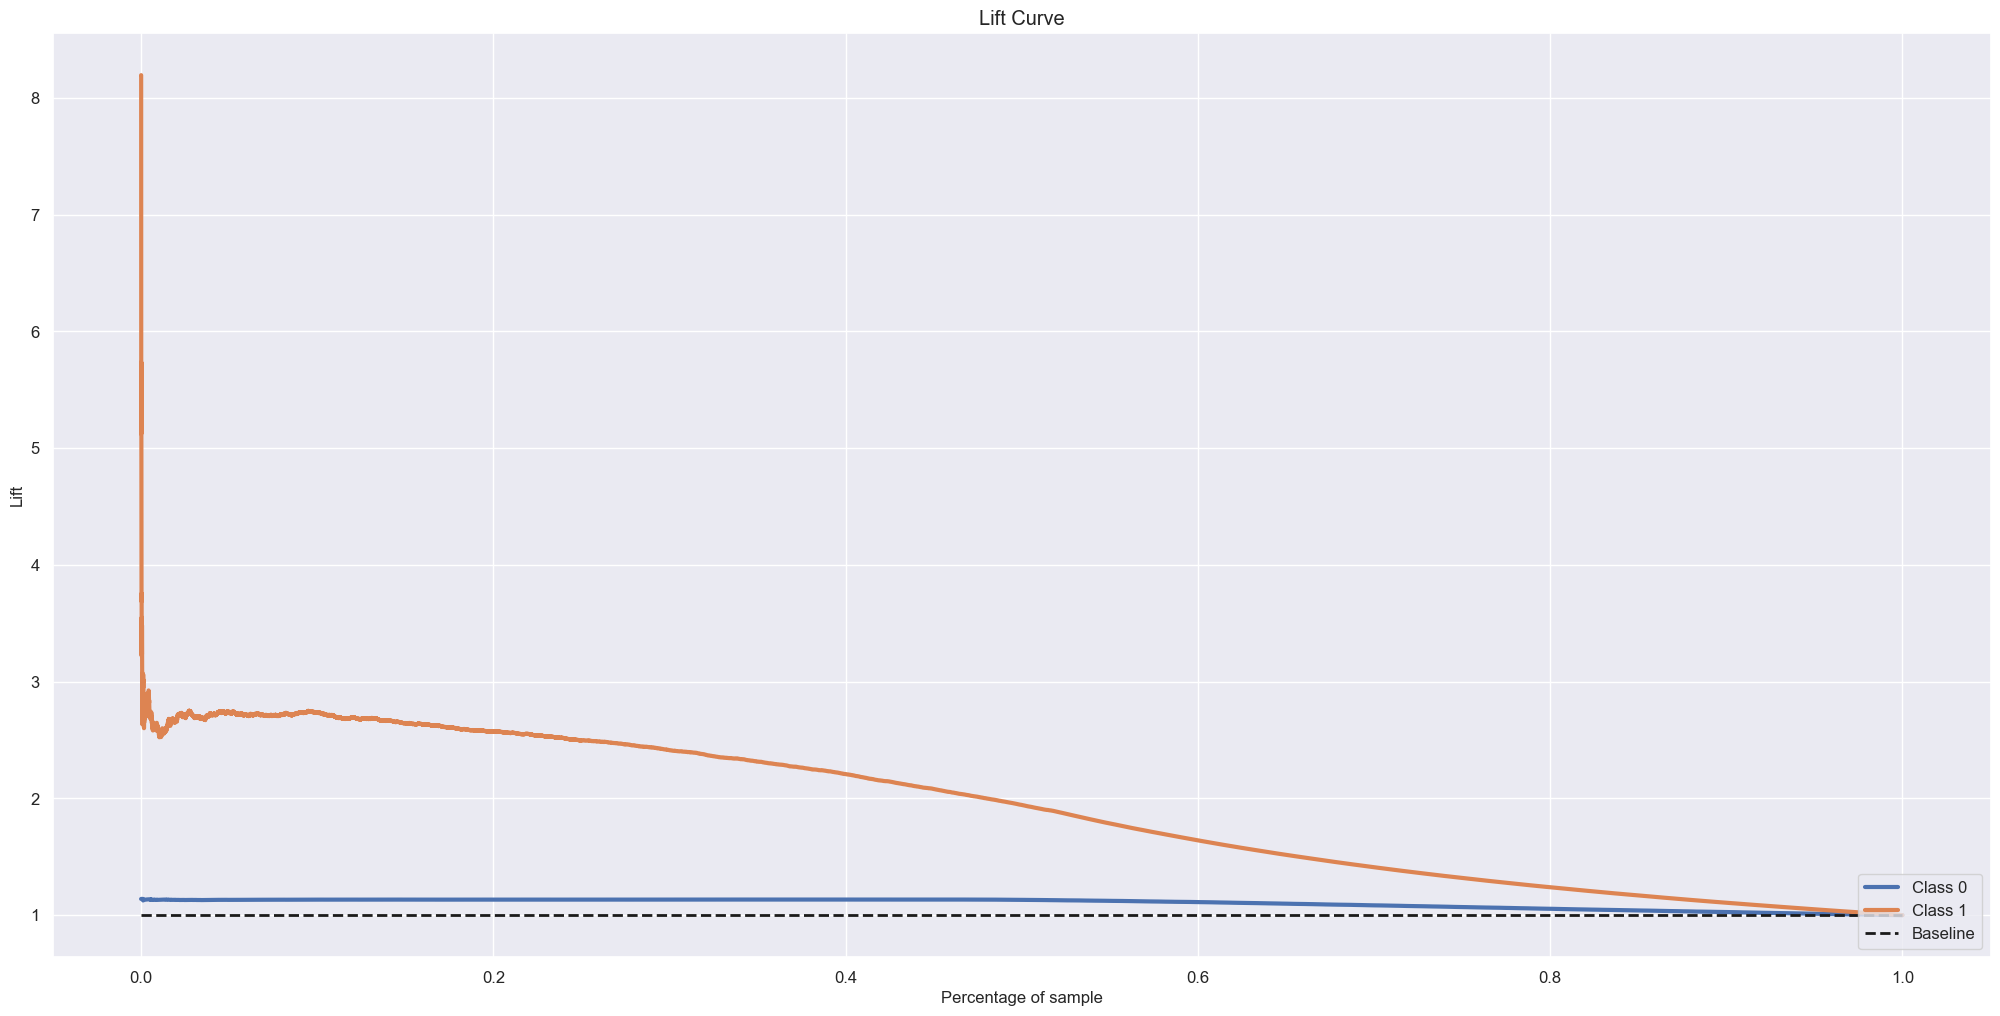

In [62]:
# Lift Curve 
skplt.metrics.plot_lift_curve(y_val, yhat_et )

# 8.0 Model Performance 

Precision at K

In [48]:
def precision_at_k(data, k=2000):
    # reset index
    data= data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    return data.loc[k, 'precision_at_k']



Recall at K

In [49]:
def recall_at_k(data, k=2000):
    # reset index
    data= data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    return data.loc[k, 'recall_at_k']


In [50]:
df8 = x_validation.copy()
df8['response'] = y_validation.copy()


# propensity score
df8['score'] = yhat_knn[:,1].tolist()

# sorted clients by propensity score

df8 = df8.sort_values('score', ascending=False)

# compute precision at K
recall_at_k_50 = recall_at_k(df8, k= 50)
precision_at_50 = precision_at_k(df8, k = 50)

print('Precision_at_k: {}\nRecall_at_k: {}'.format(precision_at_50,recall_at_k_50 ))




Precision_at_k: 0.4117647058823529
Recall_at_k: 0.0022575790152655345


# 9.0 Deploying Model to production

In [65]:
# Savinf training model - Logistic Regression 

pickle.dump(lr_model, open('/Users/franciscocaetano/Documents/Data Science/Health_Insurance_Cross_Sell/health_insurance_cross_sell/models/model_linear_regression.pkl', 'wb'))

## 9.1 Healt Insurance Class

In [ ]:


class HealthInsurance:
    def __init__(self):
        self.home_path = ''

        pass